# LR Fracture model/Low res

27/05/2020

Modified code to use Low res frac/non-frac

In [58]:
import pandas as pd
from scipy import interpolate
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd

In [59]:
fracDFs = []
shelves = ["GVIIS", "LarsenC"]
for shelf in shelves:
    ISSM_predictors = pd.read_csv("data/NEW_SETUP_"+shelf+"_ISSMoutputs_200x200.csv") #import csv with pandas
    ISSM_predictors.dropna(inplace=True)   # Drop all grid points with NA values
    fracs = pd.read_csv("data/Project2_3ice-shelves/Random_FracZones_Distance/"+shelf+"_distanceVariables.csv") #import frac csvs
    points = ISSM_predictors.loc[:,["Lat","Lon"]].to_numpy()
    fracPoints = fracs.loc[:,["Latitude","Longitude"]].to_numpy()
    linInt = interpolate.LinearNDInterpolator(points,ISSM_predictors.Damage)
    for col in ISSM_predictors.columns:
        if col not in ["Lat","Lon"]:
            linInt = interpolate.LinearNDInterpolator(linInt.tri,ISSM_predictors[col])
            fracs[col] = linInt(fracPoints)
    fracs["shelf"] = shelf
    fracDFs.append(fracs)
fracs = pd.concat(fracDFs)
#fracs.drop("Unnamed: 0", axis=1, inplace=True)
fracs.Frac_Zone = fracs.Frac_Zone.astype("category")
fracs.dropna(inplace=True)   # Drop all the points with NA for the ISSM predictors, which are points outside the 
                             # convex hall of the ISSM grid points on the iceshelf

In [60]:
geoFracs = gpd.GeoDataFrame(fracs,geometry=gpd.points_from_xy(fracs.Longitude,fracs.Latitude))
iceshelves = gpd.read_file("data/antarctica-icesheet-polygons-3857")
geoFracs.crs = "EPSG:4326"
iceshelves.to_crs("EPSG:4326",inplace=True)

In [61]:
fracDFs = []
shelves = ["GVIIS", "LarsenC"]
for shelf in shelves:
    ISSM_predictors = pd.read_csv("data/NEW_SETUP_"+shelf+"_ISSMoutputs_200x200.csv") #import csv with pandas
    ISSM_predictors.dropna(inplace=True)   # Drop all grid points with NA values
    fracs = pd.read_csv("data/Project2_3ice-shelves/Random_FracZones_Distance/"+shelf+"_Frac_Zones.csv") #import frac csvs
    points = ISSM_predictors.loc[:,["Lat","Lon"]].to_numpy()
    fracPoints = fracs.loc[:,["Latitude","Longitude"]].to_numpy()
    linInt = interpolate.LinearNDInterpolator(points,ISSM_predictors.Damage)
    for col in ISSM_predictors.columns:
        if col not in ["Lat","Lon"]:
            linInt = interpolate.LinearNDInterpolator(linInt.tri,ISSM_predictors[col])
            fracs[col] = linInt(fracPoints)
    fracs["shelf"] = shelf
    fracDFs.append(fracs)

fracs = pd.concat(fracDFs)
#fracs.drop("Unnamed: 0", axis=1, inplace=True)
fracs.Frac_Zone = fracs.Frac_Zone.astype("category")
fracs.dropna(inplace=True)
fracs

Latitude  Longitude Frac_Zone  Observed Velocity  Modelled Velocity   \
0     -70.313760 -67.933900         1          88.689137           88.689137   
1     -70.297180 -67.953820         1         154.422840          154.422840   
2     -70.280600 -67.973700         1         205.975500          205.975500   
3     -70.419960 -67.863080         1          30.965896           30.965896   
4     -70.403380 -67.883170         1          20.453783           20.453783   
...          ...        ...       ...                ...                 ...   
11682 -66.030776 -60.685020         0           6.181247            6.181247   
11683 -66.047514 -60.661893         0           8.608164            8.608164   
11684 -66.064248 -60.638733         0          13.288108           13.288108   
11685 -66.080980 -60.615539         0          24.861391           24.861391   
11686 -66.097708 -60.592312         0          72.106609           72.106609   

         Damage     BackStress      Rheology       Pstress1       Pstress2  \
0      0.000000    1571.073730  1.843794e+08  161972.443140  -60401.558635   
1      0.000655      41.335095  1.838171e+08  199880.919540 -122484.921236   
2      0.001216   12115.651724  1.826500e+08  221351.724138 -158729.310345   
3      0.000000    3877.095575  1.893063e+08  103760.890805  -40247.070675   
4      0.000000   10784.509777  1.904190e+08   52211.523636  -22166.483441   
...         ...            ...           ...            ...            ...   
11682  0.000000   11251.549390  9.390244e+07   27582.912976    6599.402353   
11683  0.000000    1980.219438  8.555631e+07   26844.000000    3221.100000   
11684  0.000000     575.348174  8.088055e+07   43605.420146   -9852.984757   
11685  0.000000   53205.338149  7.907351e+07   35266.510754  -74048.642322   
11686  0.000014  215137.154667  7.900000e+07   11040.669333 -117431.293630   

           EffStress  Pstrain1  Pstrain2  EffStrain     Float   Thickness  \
0      127093.294204  0.019560 -0.006698   0.015192  0.955656  158.381263   
1      166032.586207  0.033170 -0.019741   0.027385  0.956406  226.619681   
2      194681.034483  0.048850 -0.033952   0.042531  0.977625  186.096224   
3       87708.559224  0.006815 -0.002518   0.005665  0.860021   19.194145   
4       59728.972570  0.001700 -0.001735   0.002628  0.835448   16.547479   
...              ...       ...       ...        ...       ...         ...   
11682   20083.550265  0.001525  0.000369   0.001111  0.999996  123.605215   
11683   19118.000000  0.001404  0.000169   0.001000  0.948819   95.718043   
11684   32116.034915  0.005197 -0.001436   0.003846  0.800282   72.354493   
11685   60999.879239  0.010957 -0.027157   0.021315  0.561485   75.093446   
11686   84509.177037  0.007888 -0.098860   0.070632  0.319636   92.586020   

         shelf  
0        GVIIS  
1        GVIIS  
2        GVIIS  
3        GVIIS  
4        GVIIS  
...        ...  
11682  LarsenC  
11683  LarsenC  
11684  LarsenC  
11685  LarsenC  
11686  LarsenC  

[18052 rows x 17 columns]

In [62]:
geoFracs = gpd.GeoDataFrame(fracs,geometry=gpd.points_from_xy(fracs.Longitude,fracs.Latitude))
iceshelves = gpd.read_file("data/antarctica-icesheet-polygons-3857")
geoFracs.crs = "EPSG:4326"
iceshelves.to_crs("EPSG:4326",inplace=True)

## Plot coloured by icehself

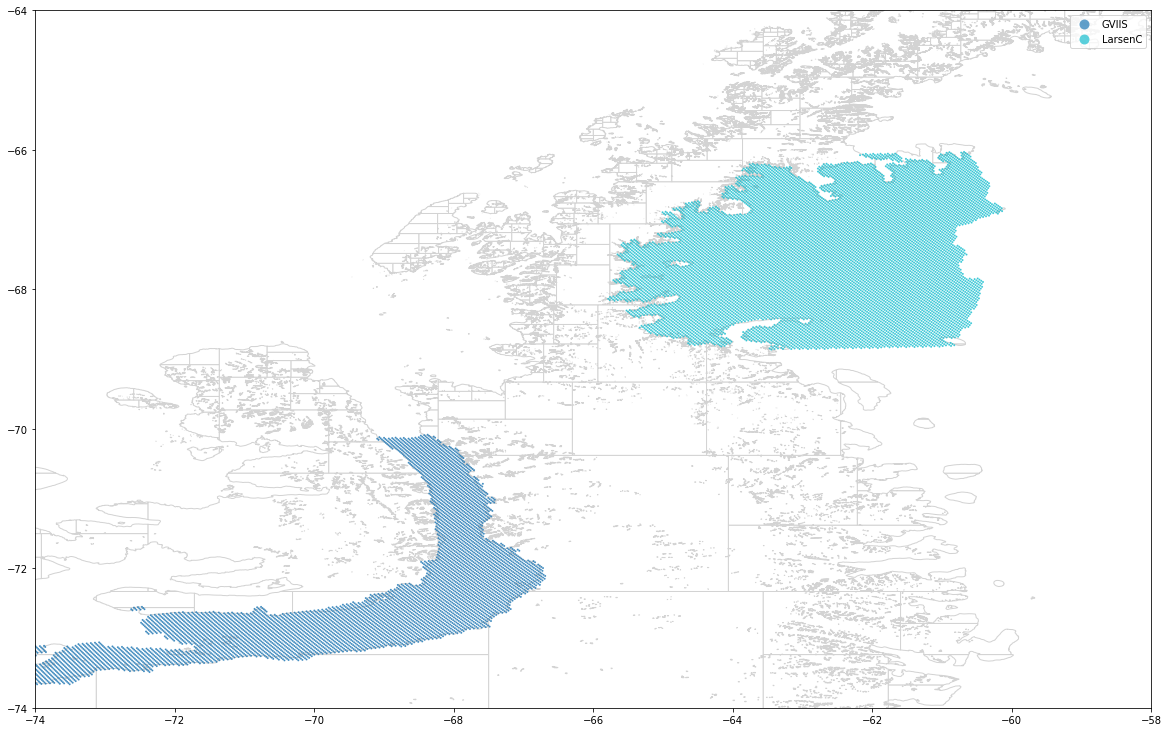

In [63]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
geoFracs.plot(ax=base,column="shelf",markersize=1,alpha=0.7,legend=True)
plt.show()

## Plot coloured by fractured or non-fractured

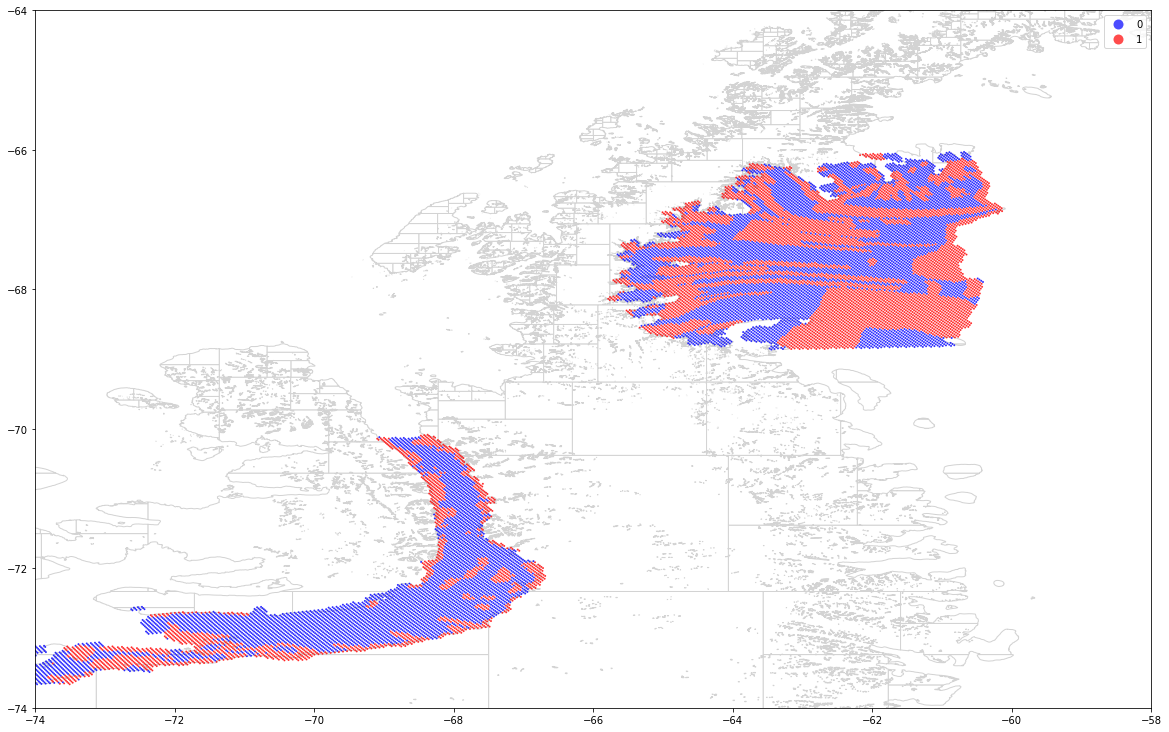

In [64]:
geoFracs.Frac_Zone = geoFracs.Frac_Zone.astype("object")
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
geoFracs.plot(ax=base,column="Frac_Zone",markersize=1,alpha=0.7,legend=True,cmap="bwr")
plt.show()

## Define inducing points by K-means clustering

In [65]:
from scipy import cluster

In [66]:
k = 100  # Number of clusters
clust = cluster.vq.kmeans(fracs.loc[:,["Longitude","Latitude"]], k, iter=100, thresh=1e-05, check_finite=True)

In [67]:
clust[0].shape

(100, 2)

In [68]:
centroids = gpd.GeoDataFrame(geometry=gpd.points_from_xy(clust[0][:,0],clust[0][:,1]))
centroids.crs = "EPSG:4326"

## Plot with inducing points in yellow

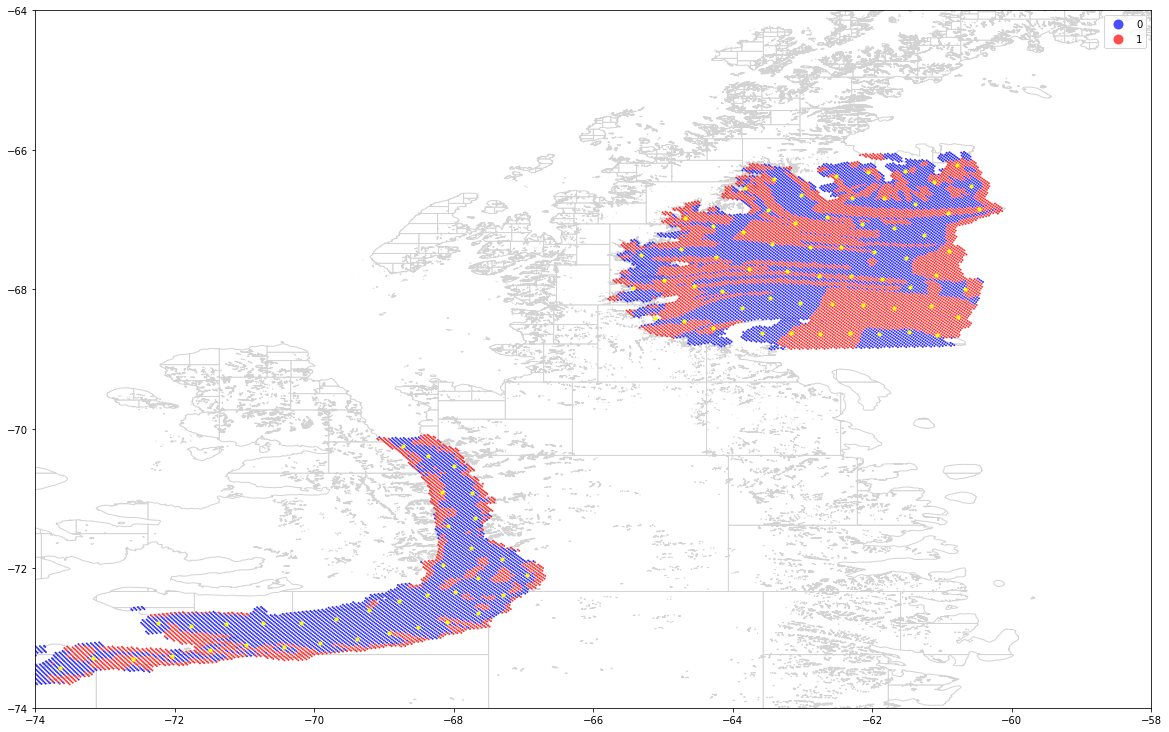

In [69]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
geoFracs.plot(ax=base,column="Frac_Zone",markersize=1,alpha=0.7,legend=True,cmap="bwr")
centroids.plot(ax=base,markersize=10,color="yellow")
plt.show()

##  Simple logistic regression model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [71]:
predictors = ['Observed Velocity',
       'Modelled Velocity ', 'Damage', 'BackStress', 'Rheology', 'Pstress1',
       'Pstress2', 'EffStress', 'Pstrain1', 'Pstrain2', 'EffStrain',
       'Thickness']

In [72]:
Y = fracs.Frac_Zone.to_numpy(dtype="float64")
X = fracs.loc[:,predictors]
X = ((X-X.mean(0))/X.std(0)).to_numpy() # Standardizing predictors

Below, I fit a logistic regression model with a penalty on the  ℓ2  norm of the coefficients. This is equivalent to the maximum a posteriori (MAP) estimator in a Bayesian analysis with a normal prior on the coefficients.

In [73]:
glm = LogisticRegression(penalty='l2')
parameters = {'C':[1, 2, 3, 4]}
clf = GridSearchCV(glm, parameters)
clf.fit(X,Y)

GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [1, 2, 3, 4]})

In [74]:
clf.cv_results_

{'mean_fit_time': array([0.07960458, 0.07620425, 0.0762044 , 0.07660427]),
 'std_fit_time': array([0.02032447, 0.00980681, 0.01000845, 0.01237161]),
 'mean_score_time': array([0.00080004, 0.00080018, 0.00100002, 0.00080009]),
 'std_score_time': array([4.00018706e-04, 4.00090228e-04, 1.16800773e-07, 4.00042545e-04]),
 'param_C': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 2}, {'C': 3}, {'C': 4}],
 'split0_test_score': array([0.6538355 , 0.6546663 , 0.6546663 , 0.65494323]),
 'split1_test_score': array([0.63528109, 0.63445029, 0.63445029, 0.63417336]),
 'split2_test_score': array([0.56897507, 0.56952909, 0.56869806, 0.56814404]),
 'split3_test_score': array([0.51163435, 0.51191136, 0.51274238, 0.5132964 ]),
 'split4_test_score': array([0.55595568, 0.55706371, 0.5598338 , 0.56066482]),
 'mean_test_score': array([0.58513634, 0.58552415, 0.58607817, 0.58624437]),
 'std_test_s

In [75]:
glm = LogisticRegression(penalty='l2',C=1)
res = glm.fit(X,Y)

In [76]:
 res.score(X,Y)

0.6752714380678041

In [77]:
print("%20.20s: %.3f"%("Intercept",res.intercept_[0]))
for i in range(len(predictors)):
    print("%20.20s: %.3f"%(predictors[i],res.coef_[0,i]))

           Intercept: -0.332
   Observed Velocity: -0.197
  Modelled Velocity : 0.544
              Damage: -0.476
          BackStress: -0.171
            Rheology: -0.704
            Pstress1: -0.215
            Pstress2: 0.768
           EffStress: 1.446
            Pstrain1: -0.383
            Pstrain2: 3.363
           EffStrain: 3.464
           Thickness: -0.288


In [78]:
geoFracs["Predicted"] = res.predict(X)
geoFracs["PredictionOutcome"] = "TP"
geoFracs.loc[(geoFracs.Frac_Zone==0) & (geoFracs.Predicted==0),"PredictionOutcome"] = "TN"
geoFracs.loc[(geoFracs.Frac_Zone==0) & (geoFracs.Predicted==1),"PredictionOutcome"] = "FP"
geoFracs.loc[(geoFracs.Frac_Zone==1) & (geoFracs.Predicted==0),"PredictionOutcome"] = "FN"

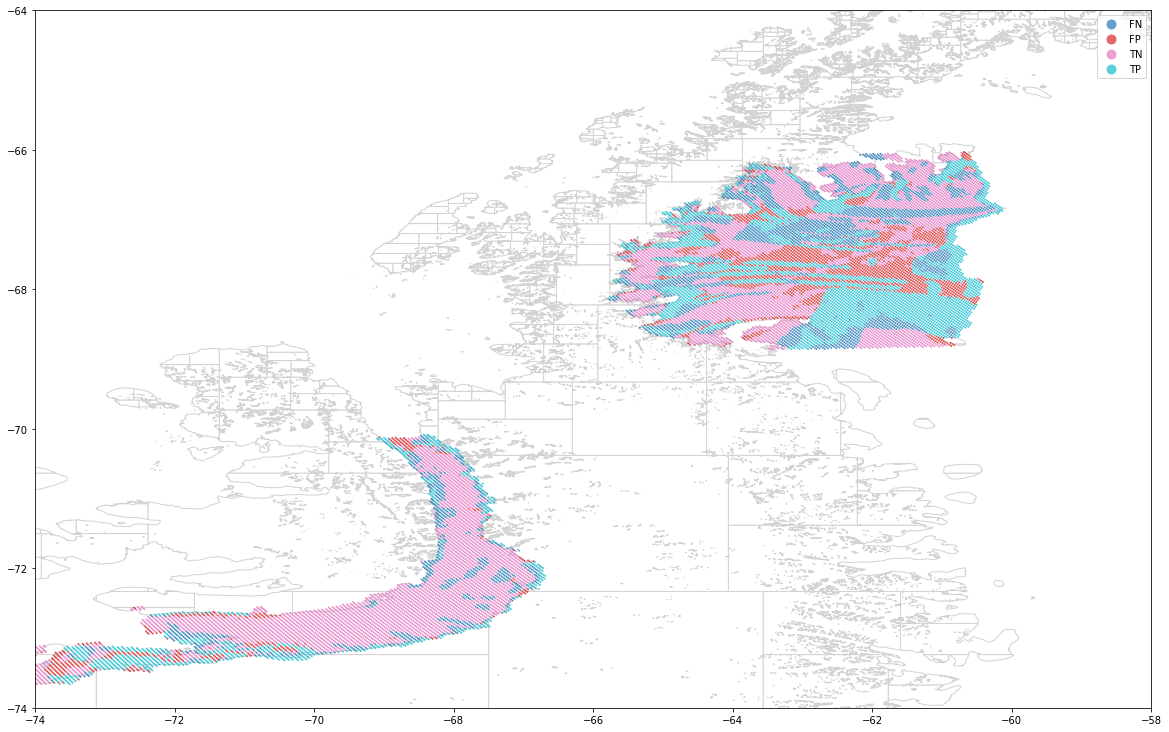

In [79]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
geoFracs.plot(ax=base,column="PredictionOutcome",markersize=1,alpha=0.7,legend=True)
plt.show()

In [80]:
import matplotlib
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import gpflow
from gpflow.ci_utils import ci_niter
from gpflow import set_trainable
from gpflow.utilities import print_summary, positive
from tensorflow.keras import backend
backend.clear_session()


gpflow.config.set_default_float(np.float64)
gpflow.config.set_default_jitter(1e-4)
gpflow.config.set_default_summary_fmt("notebook")
# convert to float64 for tfp to play nicely with gpflow in 64
f64 = gpflow.utilities.to_default_float

tf.random.set_seed(123)

%matplotlib inline

In [81]:
class MixedModelKernel(gpflow.kernels.Kernel):
    """ For inputs of the type (i,z,x) where i is of length 1, z is of length 2, and x of length p, 
    this implements the kernel
    
    k((0,z,x),(0,z',x')) = x^T x' * sigmaBeta2
    k((0,z,x),(1,z',x')) = x^T x' * sigmaBeta2
    k((1,z,x),(1,z',x')) = x^T x' * sigmaBeta2 + RBF(z,z') * sigmaF2
    """
    def __init__(self,p):
        super().__init__(active_dims=np.arange(p+3))
        self.kernelRandom = gpflow.kernels.SquaredExponential(active_dims=[1,2])
        self.kernelFixed = gpflow.kernels.Linear(active_dims=range(3,p+3))
        
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        return self.kernelFixed(X,X2) + \
               tf.tensordot(tf.cast(X[:,0]==1,dtype=tf.float64),
                            tf.cast(X2[:,0]==1,dtype=tf.float64),axes=0) * self.kernelRandom(X,X2)
            
    def K_diag(self, X):
        return self.kernelFixed(X,X2=None,full_cov=False) + \
               tf.where(X[:,0]==1,self.kernelRandom(X,X2=None,full_cov=False),0)

In [82]:
p = len(predictors)+1   # Number of predictors including intercept
n = fracs.shape[0]      # Number of samples
Y = fracs.Frac_Zone.to_numpy(dtype="float64").reshape(n,1)
X = fracs.loc[:,predictors]
X = ((X-X.mean(0))/X.std(0)).to_numpy()     # Standardize predictors
coords = fracs.loc[:,["Longitude","Latitude"]].to_numpy()
X = np.concatenate([np.ones([X.shape[0],1]),coords,np.ones([X.shape[0],1]),X],axis=1)
data = (X,Y)

In [83]:
# Inducing variables for coefficients beta
inducing = []
for i in range(p):
    inducing.append([0]*(3+i)+[1]+[0]*(p-i-1)) 
# Inducing variables for random effects at k-means clustering locations
for i,j in clust[0]:
    inducing.append([1,i,j]+[0]*p)
inducing = np.array(inducing,dtype="float64")

## Building the model and computing the maximum a posteriori (MAP) estimator

In [84]:
kernel = MixedModelKernel(p)

model = gpflow.models.SGPMC(
    data,
    kernel=kernel,
    likelihood=gpflow.likelihoods.Bernoulli(),
    inducing_variable=inducing,
    num_latent_gps=1,
)

## These settings reproduce something quite similar to the model without random effects,
## i.e. sigma^2_random ~ 0 
#set_trainable(model.kernel.kernelRandom.variance,False)
#model.kernel.kernelRandom.variance.assign(0.0001)
#model.kernel.kernelFixed.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))

# Put exponential priors on the variance of fixed and random effects
model.kernel.kernelRandom.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
model.kernel.kernelFixed.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
# Fix the lengthscale of the random effects RBF kernel, and fix the inducing points
set_trainable(model.kernel.kernelRandom.lengthscales, False)
model.kernel.kernelRandom.lengthscales.assign(1.0)
set_trainable(model.inducing_variable,False)

gpflow.utilities.print_summary(model)

In [85]:
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(model.training_loss, model.trainable_variables, options={"maxiter": 1000})
print(f"log posterior density at optimum: {model.log_posterior_density()}")

log posterior density at optimum: -8676.492279837024


In [86]:
gpflow.utilities.print_summary(model)

In [87]:
preds = (model.predict_f(X)[0].numpy().flatten()>0.5)

In [88]:
(fracs.Frac_Zone==preds).sum()/len(preds)

0.7297252382007534

In [89]:
coefs = model.predict_f(inducing)[0].numpy()
print("%20.20s: %.3f"%("Intercept",coefs[0]))
for i in range(len(predictors)):
    print("%20.20s: %.3f"%(predictors[i],coefs[i+1]))

           Intercept: -0.765
   Observed Velocity: 0.161
  Modelled Velocity : 0.094
              Damage: -0.086
          BackStress: -0.075
            Rheology: -0.198
            Pstress1: -0.187
            Pstress2: 0.240
           EffStress: 0.781
            Pstrain1: -0.297
            Pstrain2: 2.811
           EffStrain: 2.922
           Thickness: -0.015


## Running Hamiltonian Monte Carlo sampling of the variational posterior

In [90]:
num_burnin_steps = ci_niter(2500)
num_samples = ci_niter(10000)

# Note that here we need model.trainable_parameters, not trainable_variables - only parameters can have priors!
hmc_helper = gpflow.optimizers.SamplingHelper(
    model.log_posterior_density, model.trainable_parameters
)

hmc = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=hmc_helper.target_log_prob_fn, num_leapfrog_steps=10, step_size=0.01
)

adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    hmc, num_adaptation_steps=10, target_accept_prob=f64(0.75), adaptation_rate=0.1
)


@tf.function
def run_chain_fn():
    return tfp.mcmc.sample_chain(
        num_results=num_samples,
        num_burnin_steps=num_burnin_steps,
        current_state=hmc_helper.current_state,
        kernel=adaptive_hmc,
        trace_fn=lambda _, pkr: pkr.inner_results.is_accepted,
    )


In [91]:
from time import time
s1=time()

samples1, _ = run_chain_fn()
samples2, _ = run_chain_fn()
#samples3, _ = run_chain_fn()
constrained_samples1 = hmc_helper.convert_to_constrained_values(samples1)
constrained_samples2 = hmc_helper.convert_to_constrained_values(samples2)
#constrained_samples3 = hmc_helper.convert_to_constrained_values(samples3)

e1 = time()
print((e1-s1)/3600)

21.40706712252564


In [92]:
constrained_samples1[0]

<tf.Tensor: shape=(10000, 113, 1), dtype=float64, numpy=
array([[[-0.95777877],
        [ 0.06084988],
        [ 0.11010436],
        ...,
        [-2.94794773],
        [ 0.1748719 ],
        [-1.05227864]],

       [[-0.95777877],
        [ 0.06084988],
        [ 0.11010436],
        ...,
        [-2.94794773],
        [ 0.1748719 ],
        [-1.05227864]],

       [[-0.9480911 ],
        [ 0.0531088 ],
        [ 0.14252128],
        ...,
        [-2.94636872],
        [ 0.18148492],
        [-1.02775178]],

       ...,

       [[ 0.48385307],
        [ 0.31335403],
        [-0.02261422],
        ...,
        [-2.60936079],
        [ 0.20455989],
        [-0.96865616]],

       [[ 0.52612806],
        [ 0.32965704],
        [ 0.00568935],
        ...,
        [-2.57405302],
        [ 0.23601976],
        [-0.8908738 ]],

       [[ 0.48503959],
        [ 0.255205  ],
        [ 0.01189106],
        ...,
        [-2.59371517],
        [ 0.25671427],
        [-0.86147527]]])>

## Convergance Diagnostics

In [94]:
cstensor1 = tf.convert_to_tensor(constrained_samples1[0])
cstensor1 = tf.reshape(cstensor1,[10000,1,113])
cstensor2 = tf.convert_to_tensor(constrained_samples2[0])
cstensor2 = tf.reshape(cstensor2,[10000,1,113])

two_chains = tf.concat([cstensor1,cstensor2],1)
two_chains

<tf.Tensor: shape=(10000, 2, 113), dtype=float64, numpy=
array([[[-0.95777877,  0.06084988,  0.11010436, ..., -2.94794773,
          0.1748719 , -1.05227864],
        [-1.04289262,  0.23766851, -0.04943804, ..., -4.26353532,
          0.297075  , -0.43146441]],

       [[-0.95777877,  0.06084988,  0.11010436, ..., -2.94794773,
          0.1748719 , -1.05227864],
        [-1.04289262,  0.23766851, -0.04943804, ..., -4.26353532,
          0.297075  , -0.43146441]],

       [[-0.9480911 ,  0.0531088 ,  0.14252128, ..., -2.94636872,
          0.18148492, -1.02775178],
        [-1.04289262,  0.23766851, -0.04943804, ..., -4.26353532,
          0.297075  , -0.43146441]],

       ...,

       [[ 0.48385307,  0.31335403, -0.02261422, ..., -2.60936079,
          0.20455989, -0.96865616],
        [-1.23884531,  0.1755487 ,  0.07454368, ..., -1.35491743,
          0.51099206, -0.16099553]],

       [[ 0.52612806,  0.32965704,  0.00568935, ..., -2.57405302,
          0.23601976, -0.8908738 ],
    

In [95]:
CT = tfp.mcmc.potential_scale_reduction(two_chains)
CT.numpy()

array([1.00080291, 1.18130381, 1.00386866, 1.09773381, 1.14987213,
       1.40833006, 1.36064193, 1.36150375, 1.55681354, 1.72398805,
       1.79952598, 1.81084312, 1.01437171, 1.00471393, 1.00511463,
       1.01541958, 1.00572301, 1.00863961, 1.02653043, 1.00638717,
       1.00141604, 1.14003898, 1.00215817, 1.06863259, 1.00478119,
       1.02001986, 1.0597927 , 1.00027088, 1.00910116, 1.00261375,
       1.00418254, 1.01504386, 1.02900362, 1.12542855, 1.01669392,
       1.00718838, 1.00330927, 1.06016544, 1.32525862, 1.00060338,
       1.00072519, 1.10001111, 1.00006223, 1.01572141, 1.00196637,
       1.05997841, 1.50684169, 1.00169874, 1.0142213 , 1.13939519,
       1.00082903, 1.27251637, 1.12867152, 1.05414875, 2.03981301,
       1.08349403, 1.00355403, 2.75267376, 1.27458846, 1.00376321,
       1.11887363, 1.00219563, 1.01650324, 1.07784465, 1.04268792,
       1.17792863, 1.59166756, 1.31395701, 1.01405644, 1.92069537,
       1.21644892, 3.56752393, 1.55454657, 1.26143276, 1.17693

MCMC trace of hyperparameters  𝜎2fixed  and  𝜎2random .

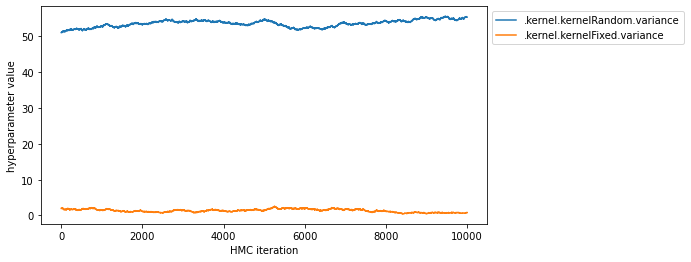

In [96]:
param_to_name = {param: name for name, param in gpflow.utilities.parameter_dict(model).items()}
name_to_index = {param_to_name[param]: i for i, param in enumerate(model.trainable_parameters)}
hyperparameters = [".kernel.kernelRandom.variance", ".kernel.kernelFixed.variance"]

plt.figure(figsize=(8, 4))
for param_name in hyperparameters:
    plt.plot(constrained_samples1[name_to_index[param_name]], label=param_name)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("HMC iteration")
_ = plt.ylabel("hyperparameter value")

## Visualising the posterior distribution of the linear coefficients

In [100]:
coef_samples = model.predict_f_samples(inducing[0:p,:],10000).numpy()

In [101]:
coef_samples = pd.DataFrame(coef_samples[:,:,0])

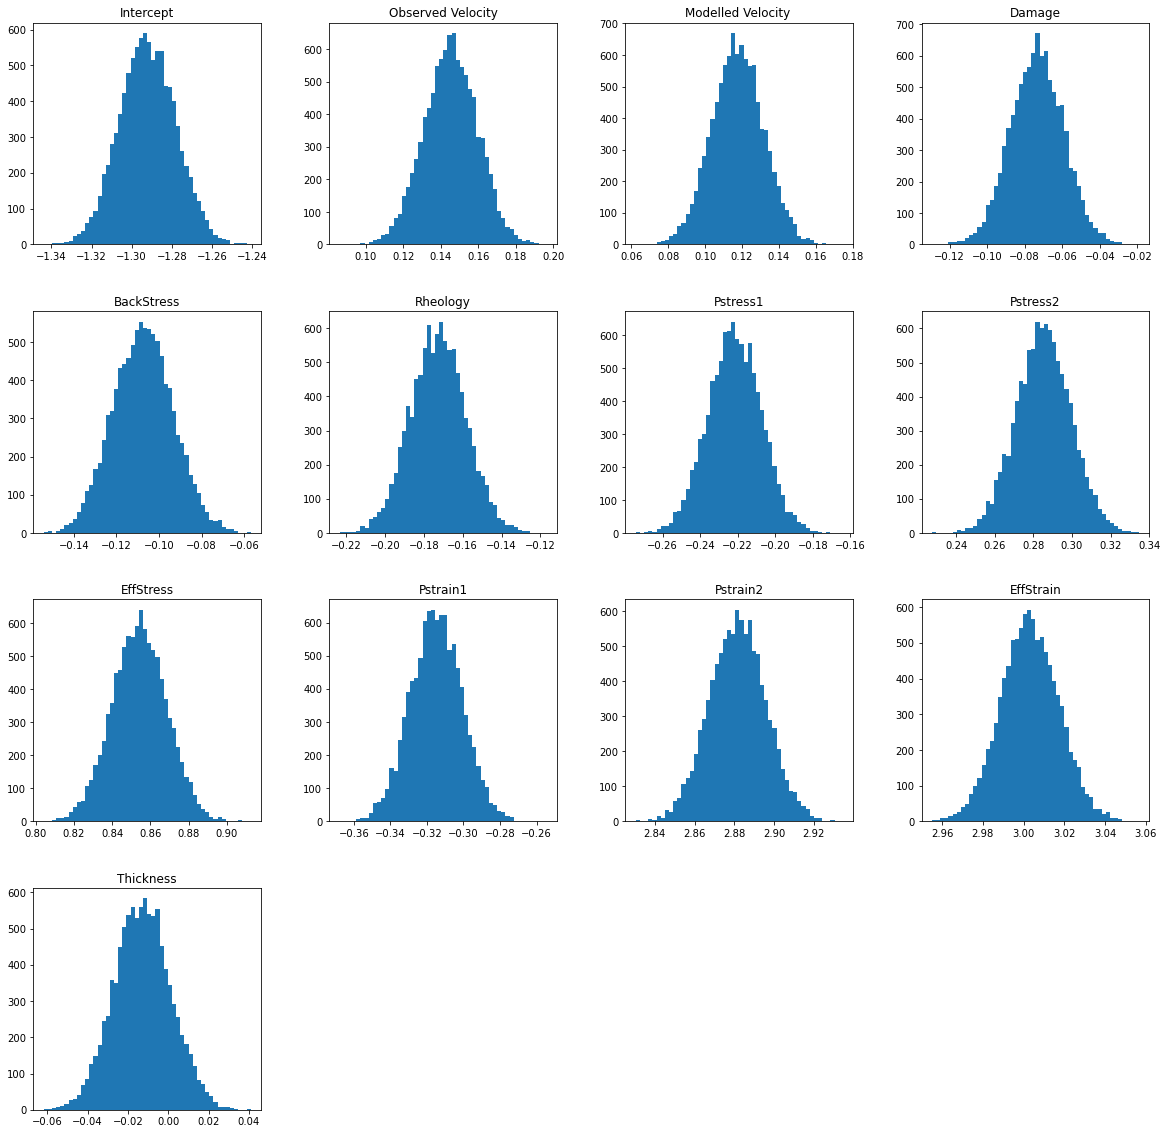

In [102]:
coef_samples.columns = ["Intercept"]+predictors
coef_samples.hist(figsize=[20,20],bins=50,grid=False)
plt.show()

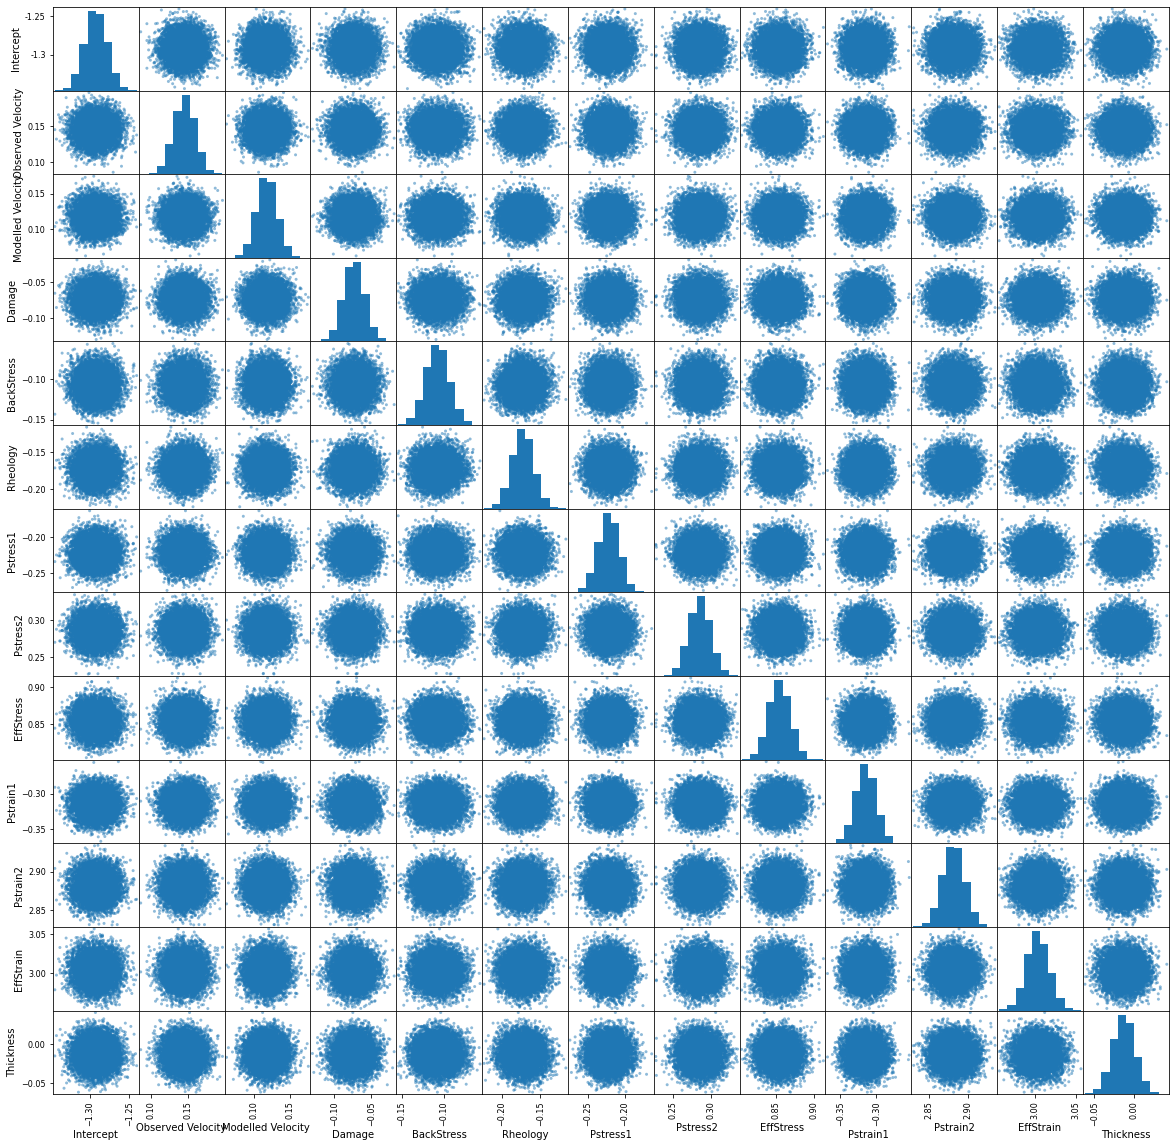

In [103]:
pd.plotting.scatter_matrix(coef_samples,figsize=(20,20))
plt.show()

In [104]:
# Load ISSM data on grid
ISSM_DFs = []
shelves = ["GVIIS", "LarsenC"]
for shelf in shelves:
    ISSM_predictors = pd.read_csv("data/NEW_SETUP_"+shelf+"_ISSMoutputs_200x200.csv")
    ISSM_predictors.dropna(inplace=True)   # Drop all grid points with NA values
    ISSM_DFs.append(ISSM_predictors)
ISSM_predictors = pd.concat(ISSM_DFs)

In [105]:
Xnew = ISSM_predictors.loc[:,predictors]
Xnew = ((Xnew-Xnew.mean(0))/Xnew.std(0)).to_numpy()     # Standardize predictors
coords = ISSM_predictors.loc[:,["Lon","Lat"]].to_numpy()
Xnew = np.concatenate([np.ones([Xnew.shape[0],1]),coords,np.ones([Xnew.shape[0],1]),Xnew],axis=1)

In [106]:
preds = model.predict_y(Xnew)
ISSM_predictors["Predicted_y"] = preds[0].numpy()
ISSM_predictors["Predicted_y_var"] = preds[1].numpy()

In [107]:
ISSM_predictors = gpd.GeoDataFrame(ISSM_predictors,
                                   geometry=gpd.points_from_xy(ISSM_predictors.Lon,ISSM_predictors.Lat))
ISSM_predictors.crs = "EPSG:4326"

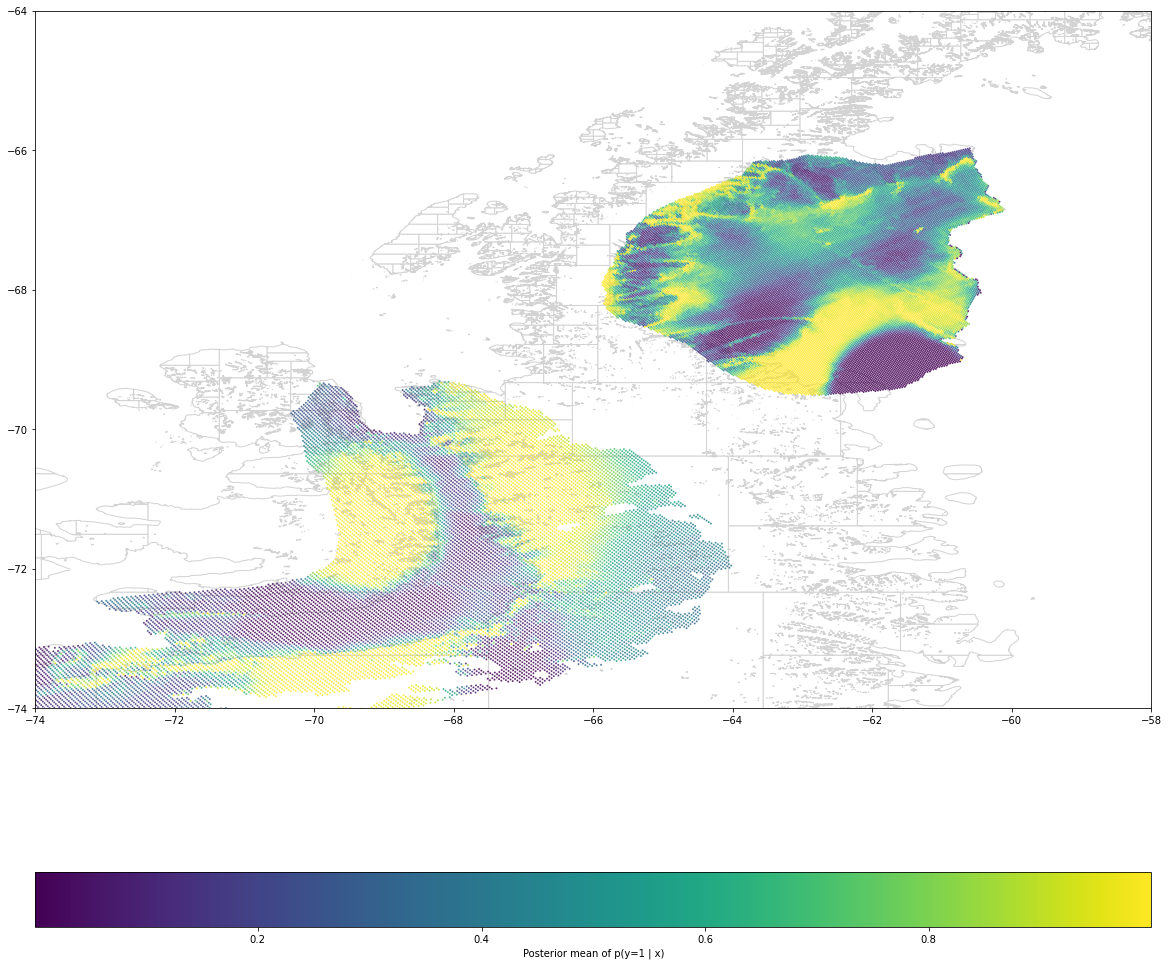

In [108]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
ISSM_predictors.plot(ax=base,column="Predicted_y",markersize=1,alpha=0.7,
                     legend=True, 
                     legend_kwds={'label': "Posterior mean of p(y=1 | x)",'orientation': "horizontal"})
plt.show()

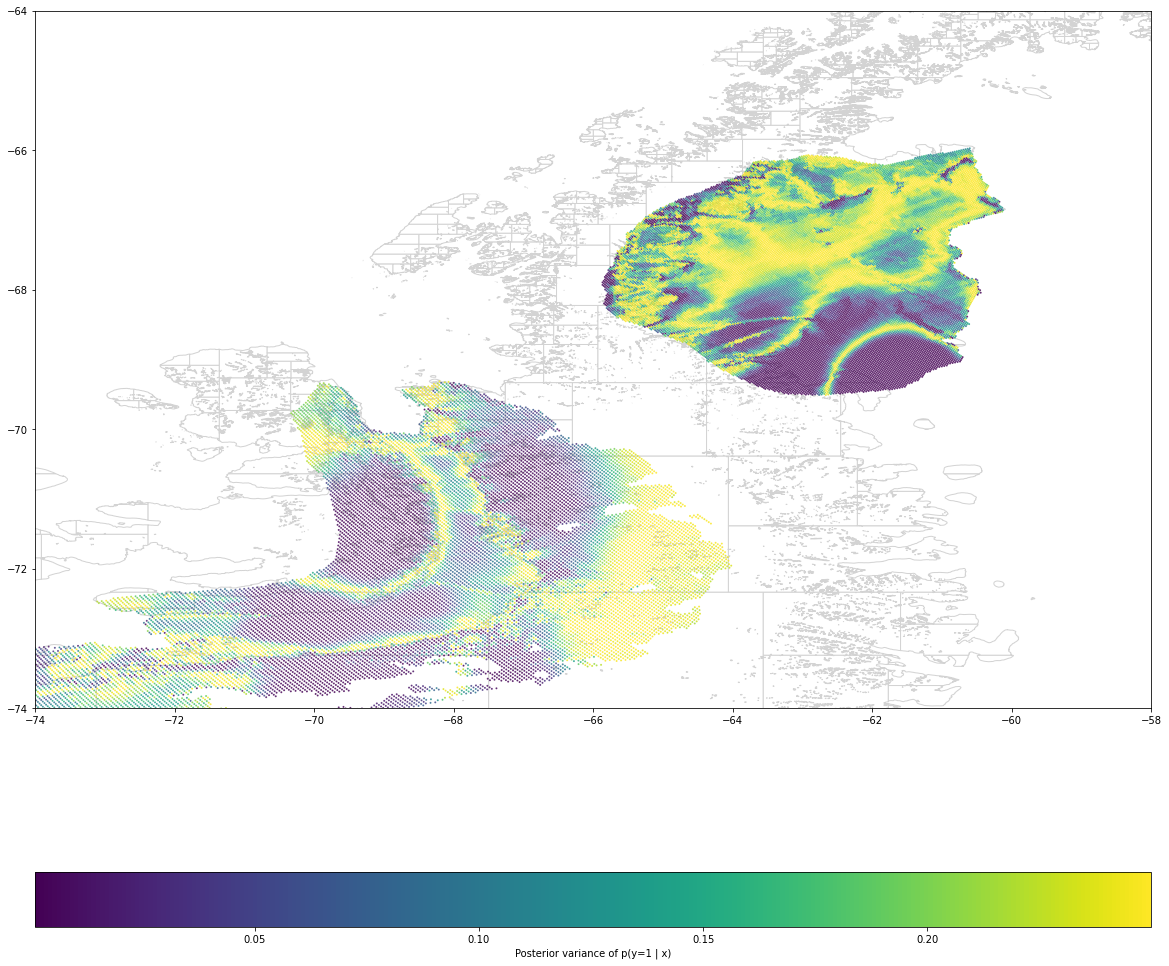

In [109]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
ISSM_predictors.plot(ax=base,column="Predicted_y_var",markersize=1,alpha=0.7,
                     legend=True, 
                     legend_kwds={'label': "Posterior variance of p(y=1 | x)",'orientation': "horizontal"})
plt.show()

In [110]:
coords = ISSM_predictors.loc[:,["Lon","Lat"]].to_numpy()
Xnew = np.concatenate([np.ones([coords.shape[0],1]),coords,np.zeros((coords.shape[0],p+3))],axis=1)

In [111]:
preds = model.predict_f(Xnew)
ISSM_predictors["Predicted_g"] = preds[0].numpy()
ISSM_predictors["Predicted_g_var"] = preds[1].numpy()

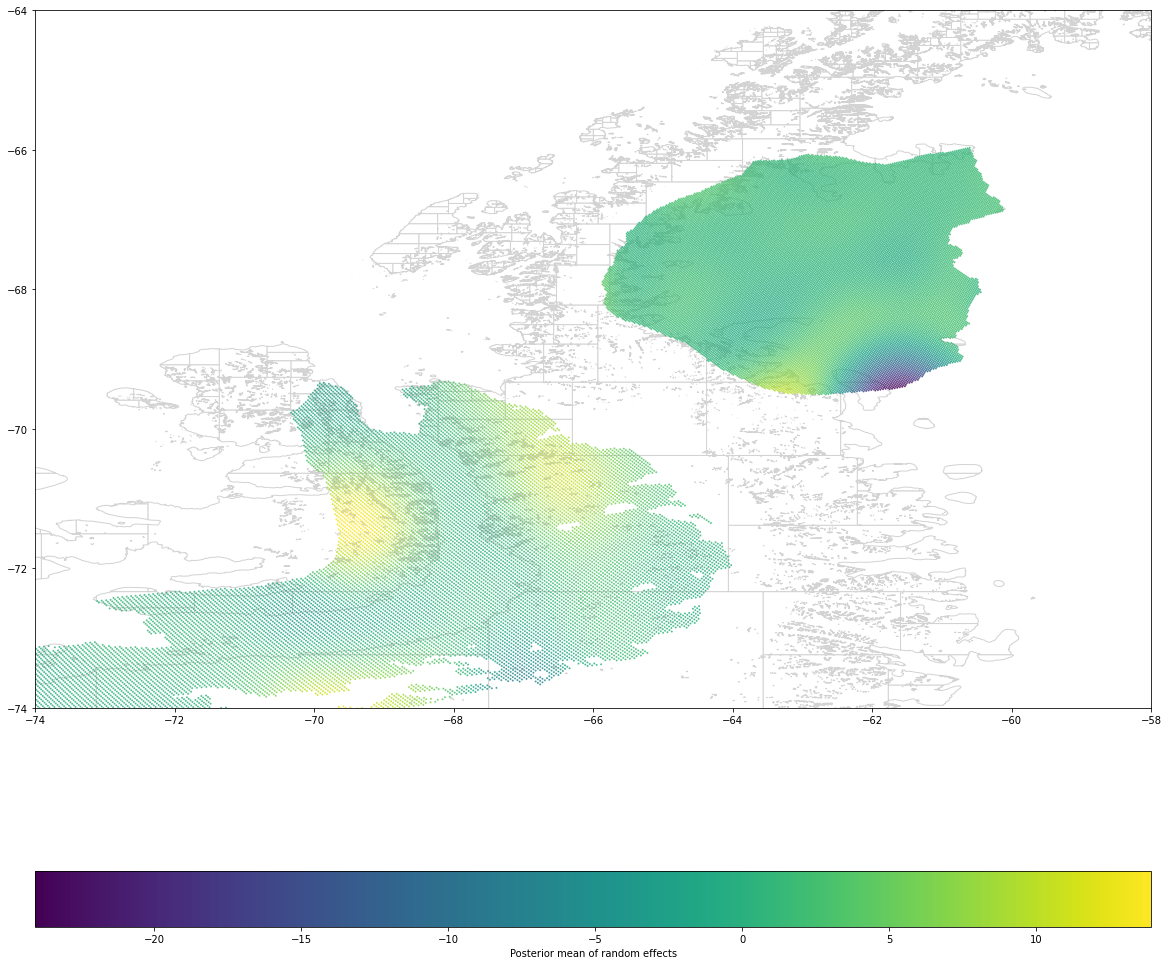

In [112]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
ISSM_predictors.plot(ax=base,column="Predicted_g",markersize=1,alpha=0.7,
                     legend=True, 
                     legend_kwds={'label': "Posterior mean of random effects",'orientation': "horizontal"})
plt.show()

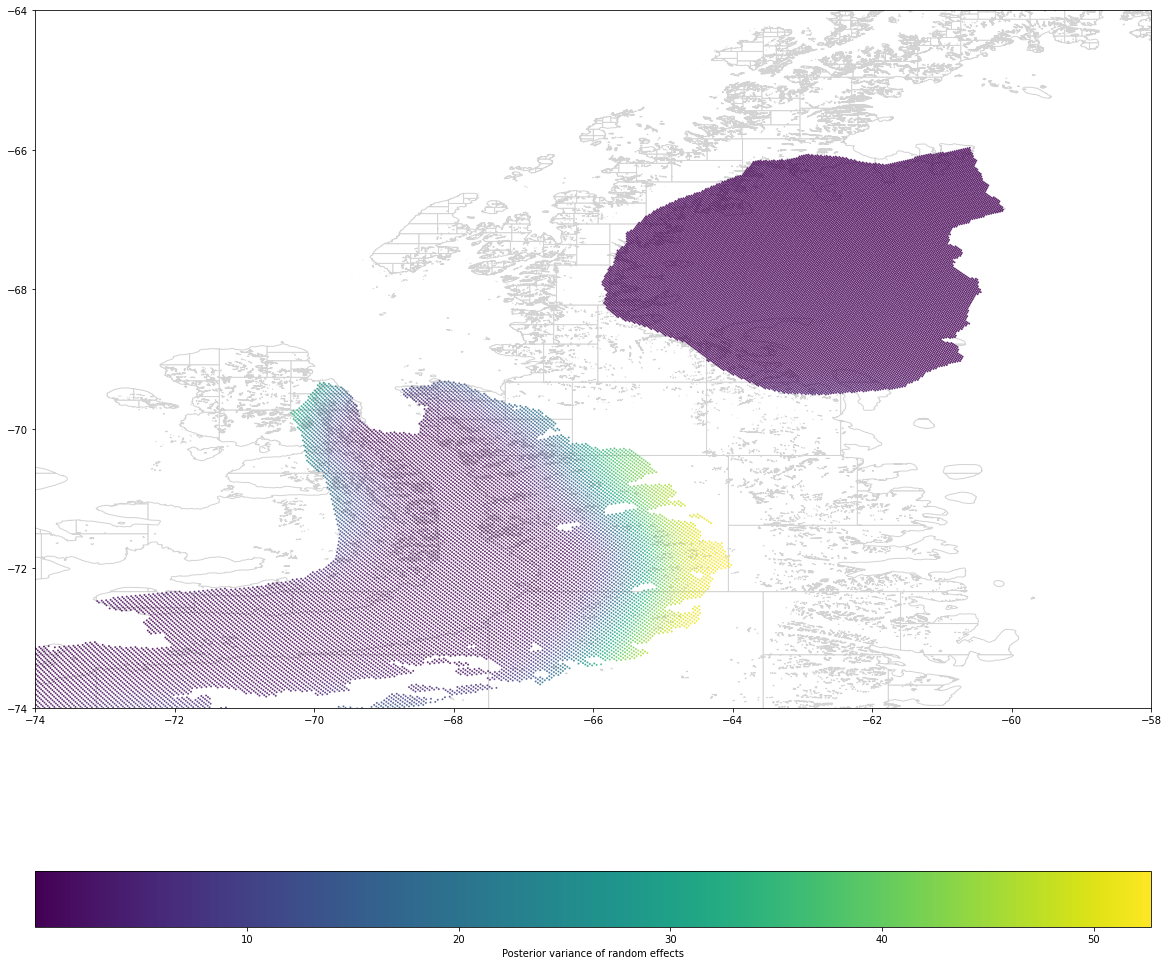

In [113]:
base = iceshelves.plot(color="white",edgecolor="lightgrey",figsize=(20,20))
plt.xlim([-74,-58]) 
plt.ylim([-74,-64])
ISSM_predictors.plot(ax=base,column="Predicted_g_var",markersize=1,alpha=0.7,
                     legend=True, 
                     legend_kwds={'label': "Posterior variance of random effects",'orientation': "horizontal"})
plt.show()

In [114]:
from sinfo import sinfo
sinfo()

-----
geopandas                   0.7.0
gpflow                      2.0.0
matplotlib                  3.2.1
numpy                       1.18.4
pandas                      1.1.0
scipy                       1.4.1
sinfo                       0.3.1
sklearn                     0.23.1
tensorflow                  2.1.0
tensorflow_core             2.1.0
tensorflow_probability      0.9.0
-----
IPython             7.17.0
jupyter_client      6.1.6
jupyter_core        4.6.3
notebook            6.1.1
-----
Python 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 01:53:57) [MSC v.1916 64 bit (AMD64)]
Windows-7-6.1.7601-SP1
4 logical CPU cores, Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
-----
Session information updated at 2020-08-21 11:10
